In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
df=pd.read_csv("weight_height_dataset.csv")

In [4]:
df

,Height(cm),Weight(kg),Class
0,171.408421,69.037935,Normal
1,153.935688,47.797508,Underweight
2,176.573961,78.871438,Overweight
3,170.663093,70.263714,Normal
4,164.009912,68.730922,Normal
...,...,...,...
145,181.933161,85.660306,Overweight
146,166.007758,73.997699,Normal
147,158.383396,55.464065,Underweight
148,174.596901,86.130276,Overweight


In [5]:
X=df.drop('Class',axis=1)
y=df['Class']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_test,Y_test

(     Height(cm)  Weight(kg)
 73   167.994192   76.505154
 18   156.647261   51.335016
 118  171.333920   70.912901
 78   169.968486   73.902363
 76   171.389720   68.779720
 31   177.740527   83.352176
 64   179.098169   82.629365
 141  174.604070   92.592633
 68   160.648719   66.327005
 82   161.586887   58.771700
 110  168.890980   70.716720
 12   176.299598   89.709293
 36   159.924211   56.153378
 9    179.198932   89.625512
 19   163.490092   56.483632
 56   165.336540   58.206047
 104  162.299134   69.270385
 69   166.183559   63.980637
 55   163.741888   70.113080
 132  179.322071   96.839584
 29   164.582065   52.487563
 127  165.924112   66.632277
 26   164.021128   73.497982
 128  161.806830   62.963657
 131  175.382512   84.698945
 145  181.933161   85.660306
 108  180.538624   84.070203
 143  156.201879   49.355527
 45   164.180631   76.222786
 30   172.341812   78.373656,
 73          Normal
 18     Underweight
 118         Normal
 78          Normal
 76          Normal


In [12]:
clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split=15,min_samples_leaf=5,splitter='best')
clf=clf.fit(X_train,Y_train)
prediction=clf.predict(X_test)

In [13]:
prediction

array(['Normal', 'Underweight', 'Normal', 'Normal', 'Normal',
       'Overweight', 'Overweight', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Overweight', 'Underweight',
       'Underweight', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Overweight', 'Overweight', 'Underweight', 'Normal', 'Normal'],
      dtype=object)

In [14]:
from sklearn.metrics import accuracy_score

In [16]:
print("Train data accuracy:",accuracy_score(y_true=Y_train,y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true=Y_test,y_pred=prediction))

Train data accuracy: 0.95
Test data accuracy: 0.9333333333333333


In [17]:
from sklearn import metrics
cf=metrics.confusion_matrix(Y_test,prediction)
cf

array([[12,  0,  0],
       [ 1,  9,  0],
       [ 1,  0,  7]], dtype=int64)

In [19]:
print("Precison",metrics.precision_score(Y_test,prediction,average=None))

Precison [0.85714286 1.         1.        ]


In [20]:
print("Recall",metrics.recall_score(Y_test,prediction,average=None))

Recall [1.    0.9   0.875]


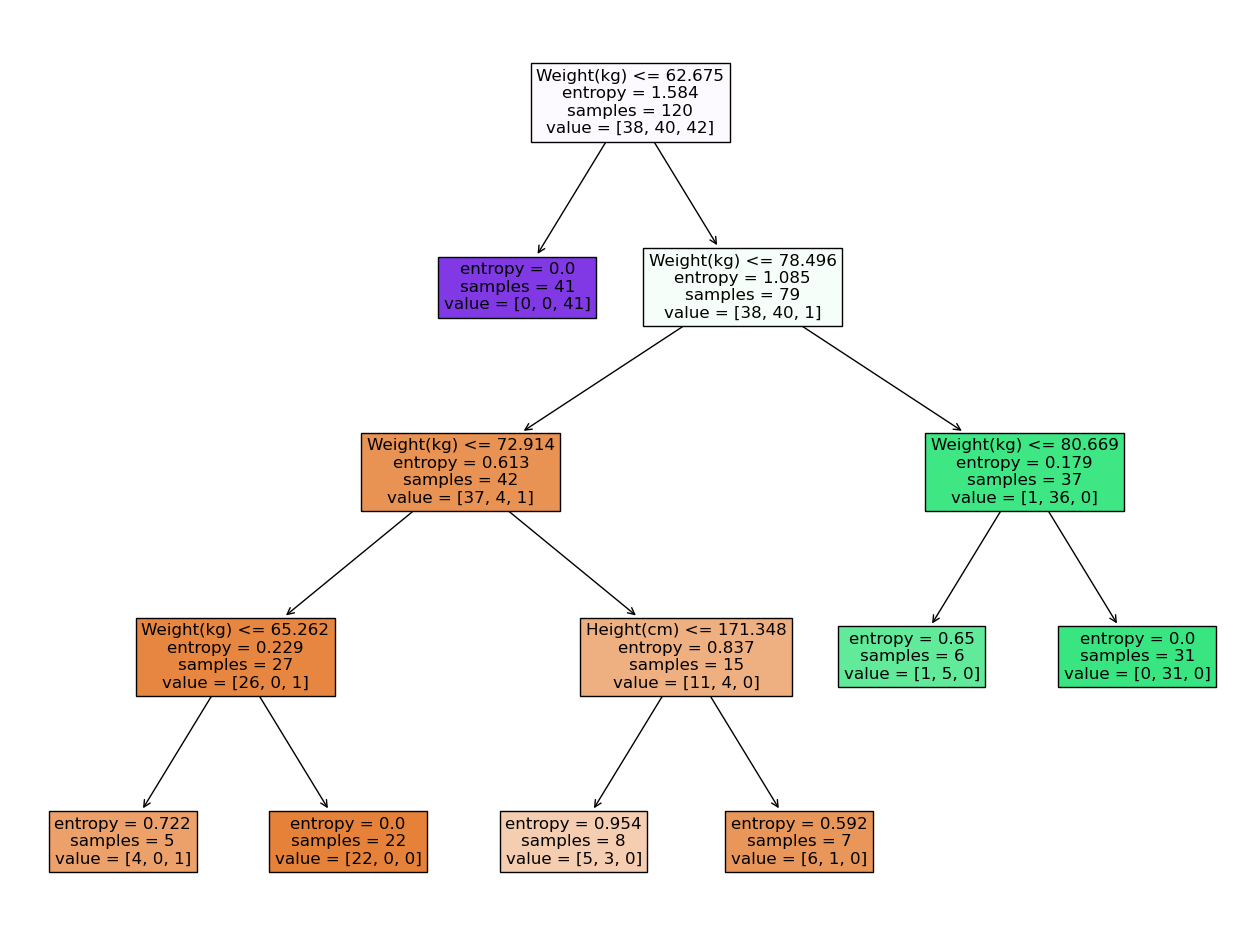

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16,12))
a=plot_tree(clf,feature_names=['Height(cm)','Weight(kg)'],fontsize=12,filled=True)

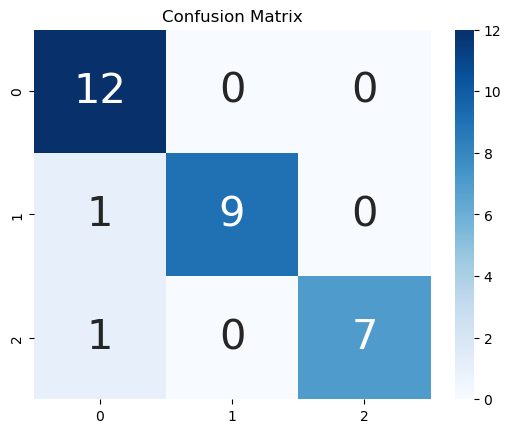

In [25]:
import seaborn as sns
import pandas as pd
ax=plt.axes()
df_cm=cf
sns.heatmap(df_cm,annot=True,annot_kws={"size":30},fmt='d',cmap="Blues",ax=ax)
ax.set_title('Confusion Matrix')
plt.show()